In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv('datasets/Superstore.csv')

# Histogram of Quantities

In [42]:
quantities = df['Quantity']

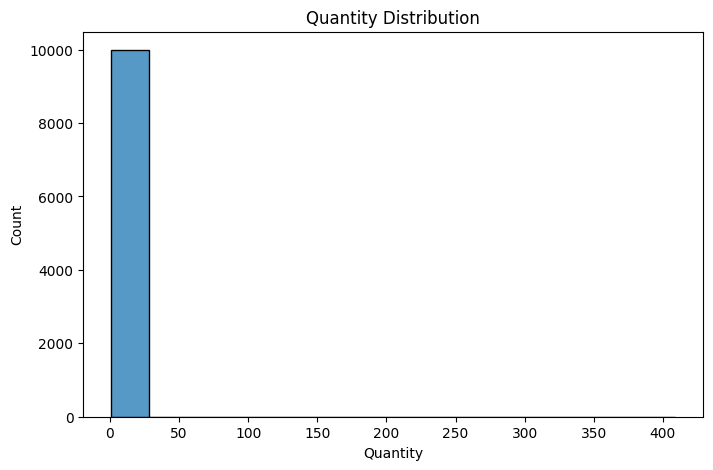

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(data=quantities, bins=15, kde=False, legend=True)
plt.title('Quantity Distribution')
plt.show()

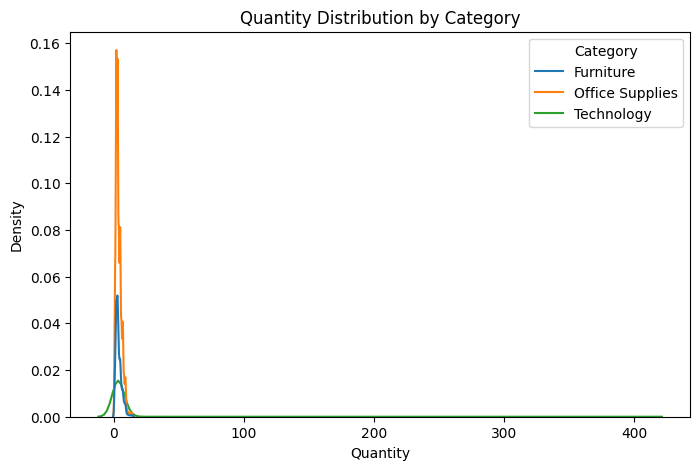

In [44]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='Quantity', hue='Category', legend=True)
plt.title('Quantity Distribution by Category')
plt.show()

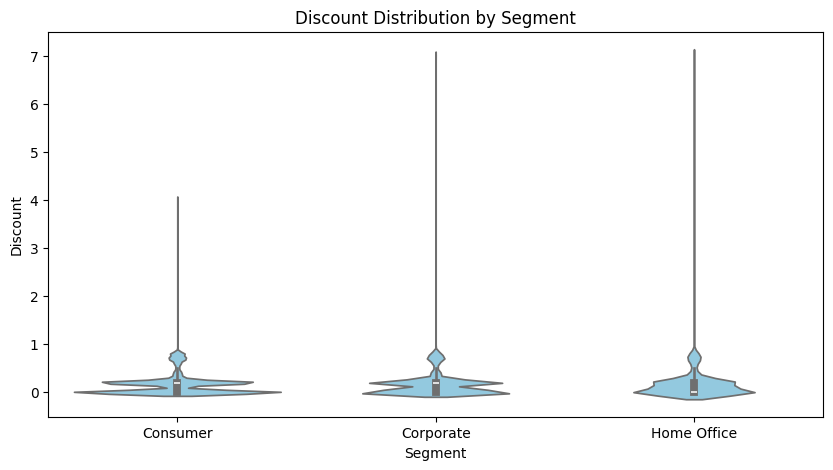

In [45]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, x='Segment', y='Discount', color="skyblue")
plt.title('Discount Distribution by Segment')
plt.show()

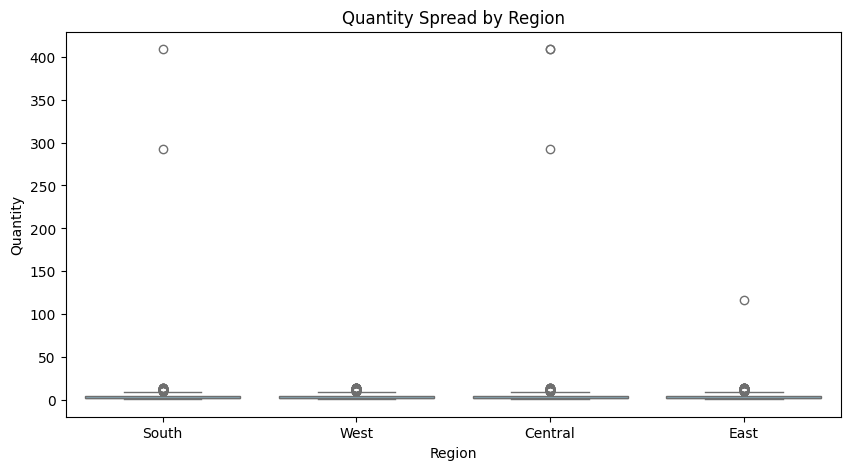

In [46]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Region', y='Quantity', color="skyblue")
plt.title('Quantity Spread by Region')
plt.show()

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'SubCategory',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Unnamed:_21'],
      dtype='object')


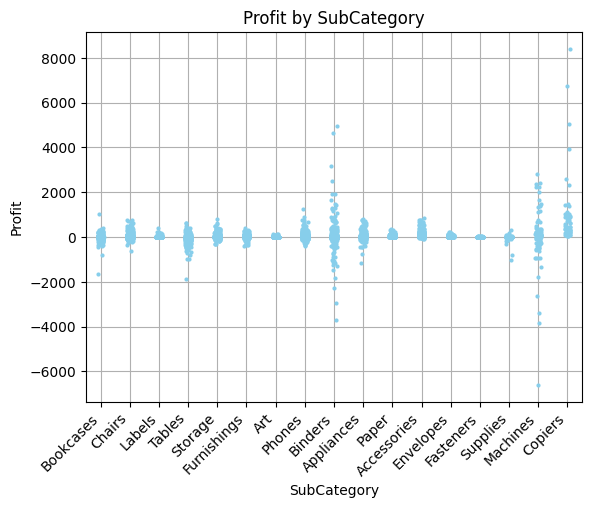

In [47]:
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '')
print(df.columns)

# Plot stripplot using the correct column name
sns.stripplot(data=df, x='SubCategory', y='Profit', size=3, color="skyblue")
plt.title('Profit by SubCategory')
plt.xticks(rotation=45, ha="right")
plt.grid()
plt.show()

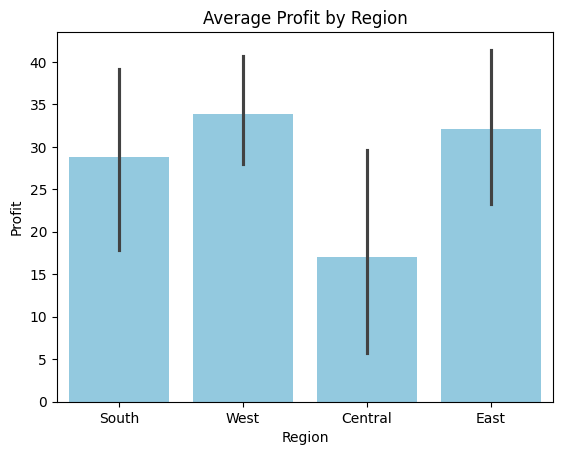

In [48]:
sns.barplot(data=df, x='Region', y='Profit', estimator='mean',color="skyblue")
plt.title('Average Profit by Region')
plt.show()

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'SubCategory',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Unnamed:_21'],
      dtype='object')


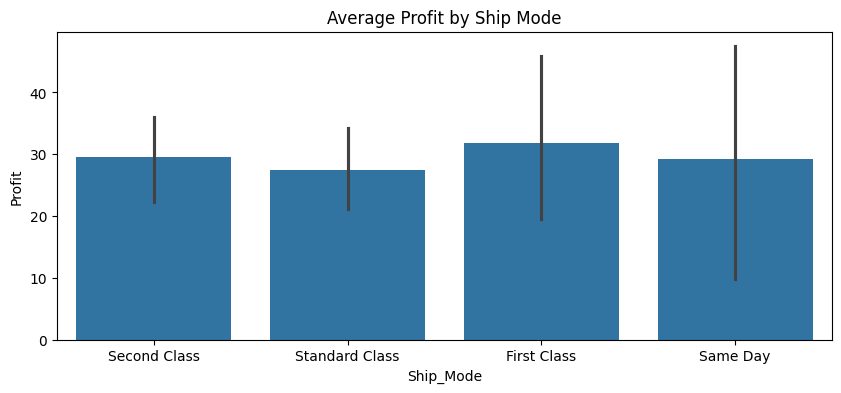

In [49]:
# Clean column names and check available columns
df.columns = df.columns.str.replace(' ', '_').str.replace('-', '')
print(df.columns)

# Plot barplot using the correct column name
plt.figure(figsize=(10,4))
sns.barplot(data=df, x='Ship_Mode', y='Profit', estimator='mean')
plt.title('Average Profit by Ship Mode')
plt.show()

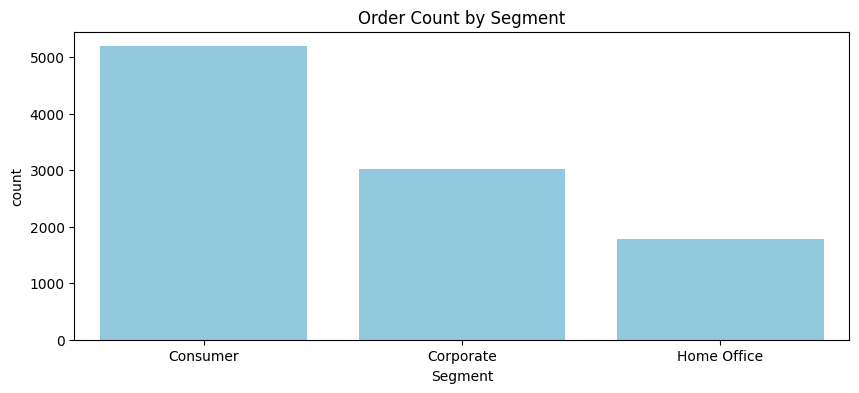

In [50]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Segment', color="skyblue")
plt.title('Order Count by Segment')
plt.show()

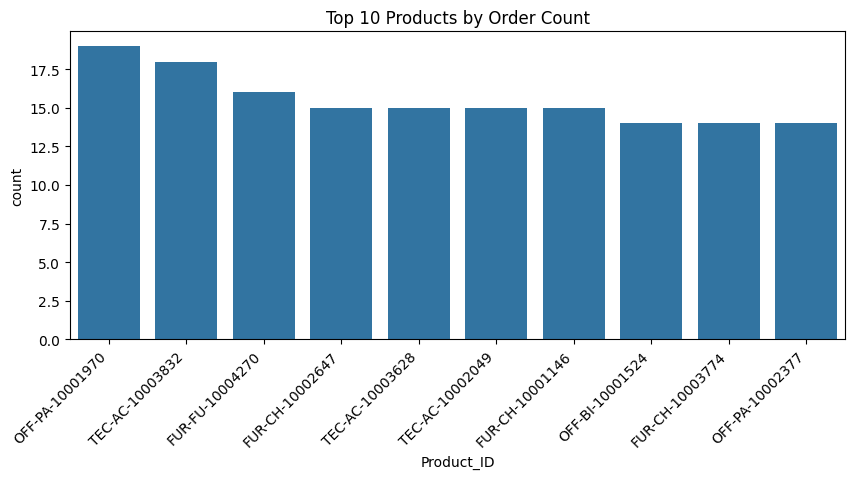

In [51]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Product_ID',
order=df['Product_ID'].value_counts().index[:10])
plt.title('Top 10 Products by Order Count')
plt.xticks(rotation=45, ha="right")
plt.show()

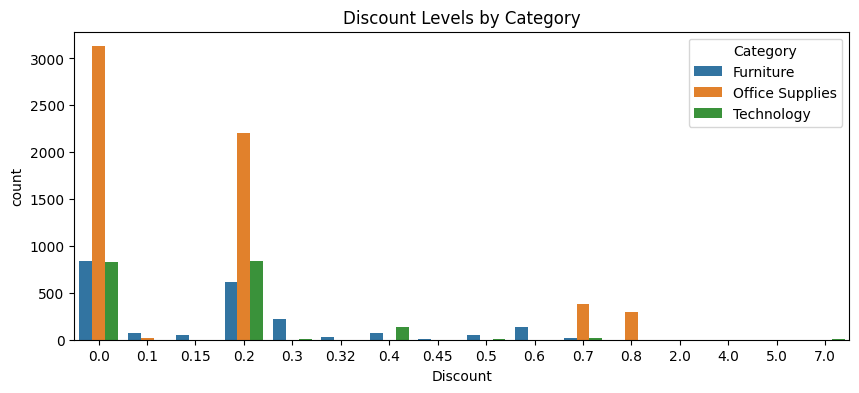

In [52]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Discount', hue='Category')
plt.title('Discount Levels by Category')
plt.show()

<Axes: ylabel='count'>

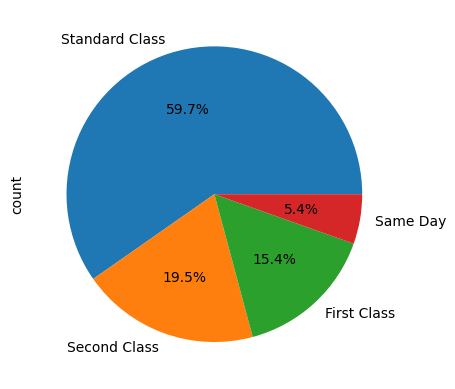

In [53]:
df['Ship_Mode'].value_counts().plot.pie(autopct='%1.1f%%')

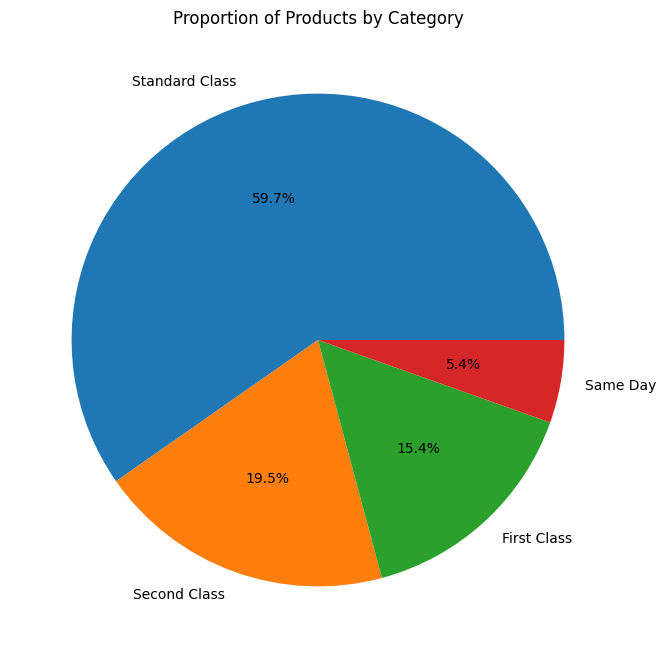

In [54]:
plt.figure(figsize=(8,8))
subcat_count = df['Ship_Mode'].value_counts()
plt.pie(subcat_count, labels=subcat_count.index, autopct='%1.1f%%')
plt.title("Proportion of Products by Category")
plt.show()

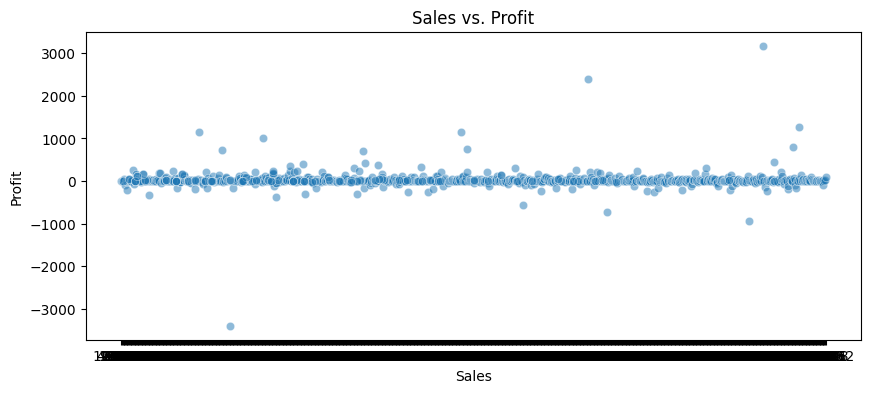

In [55]:
plt.figure(figsize=(10,4))
sample_df = df.sample(n=1000, random_state=1) if len(df) > 1000 else df
sns.scatterplot(data=sample_df, x='Sales', y='Profit', alpha=0.5)
plt.title('Sales vs. Profit')
plt.show()

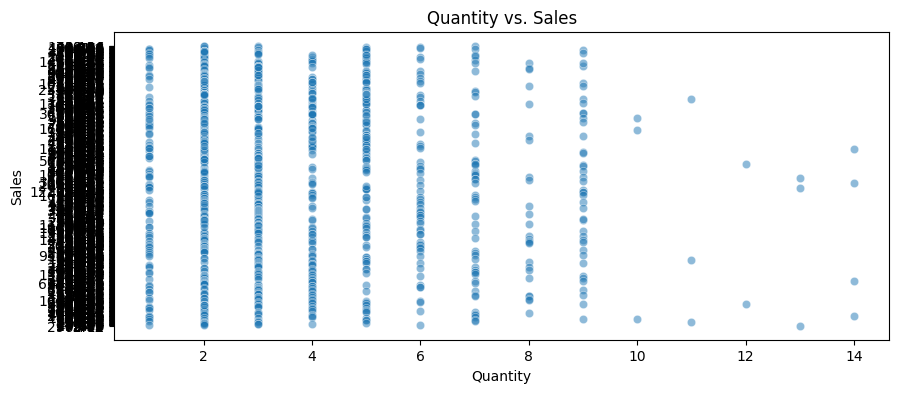

In [56]:
plt.figure(figsize=(10,4))
sample_df = df.sample(n=1000, random_state=1) if len(df) > 1000 else df
sns.scatterplot(data=sample_df, x='Quantity', y='Sales', alpha=0.5)
plt.title('Quantity vs. Sales')
plt.show()

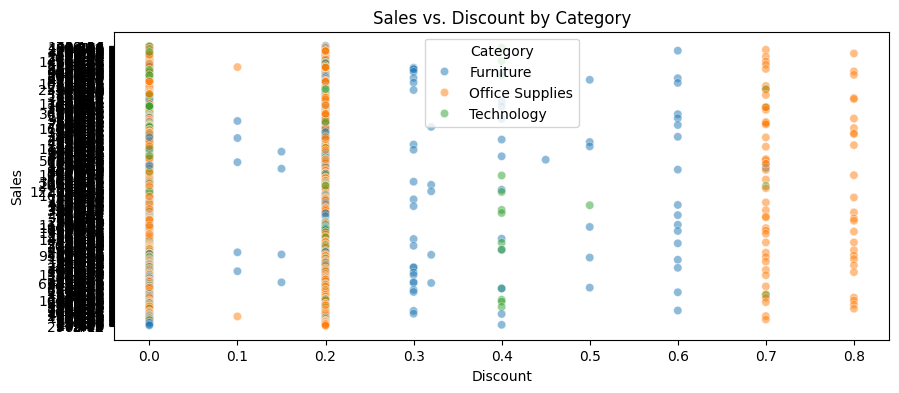

In [57]:
plt.figure(figsize=(10,4))
sample_df = df.sample(n=1000, random_state=1) if len(df) > 1000 else df
sns.scatterplot(data=sample_df, x='Discount', y='Sales', hue='Category', alpha=0.5)
plt.title('Sales vs. Discount by Category')
plt.show()

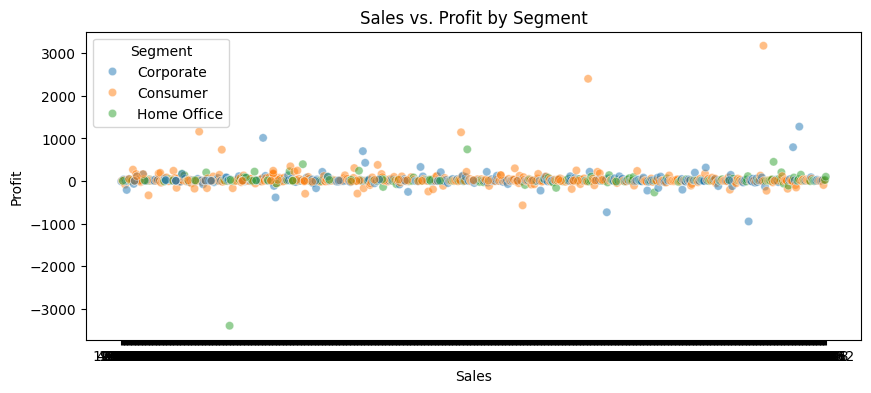

In [58]:
plt.figure(figsize=(10,4))
sample_df = df.sample(n=1000, random_state=1) if len(df) > 1000 else df
sns.scatterplot(data=sample_df, x='Sales', y='Profit', hue='Segment', alpha=0.5)
plt.title('Sales vs. Profit by Segment')
plt.show()

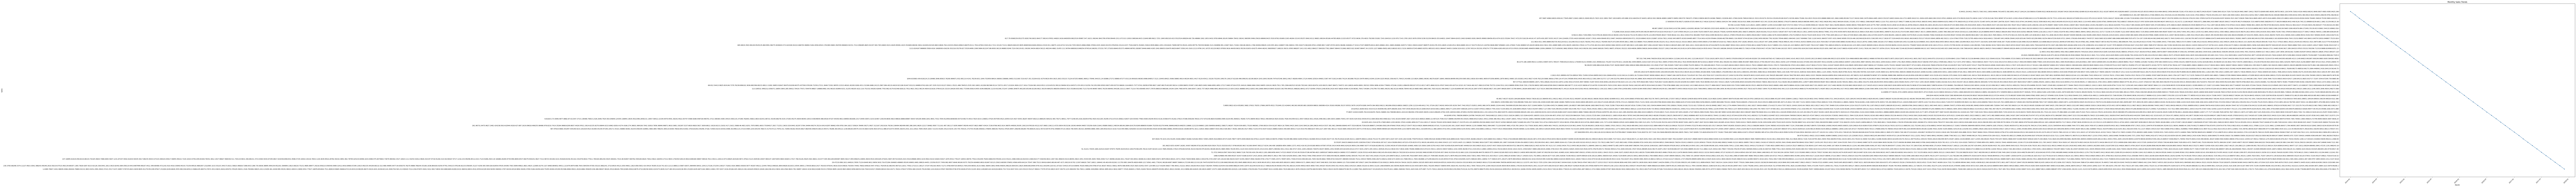

In [59]:
plt.figure(figsize=(27,20))
df['Month'] = pd.to_datetime(df['Order_Date']).dt.to_period('M')
df['Month'] = df['Month'].dt.to_timestamp()

sns.lineplot(data=df.groupby('Month')['Sales'].sum().reset_index(),
x='Month', y='Sales', marker='o', color='steelblue')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45, ha='right')
plt.show()

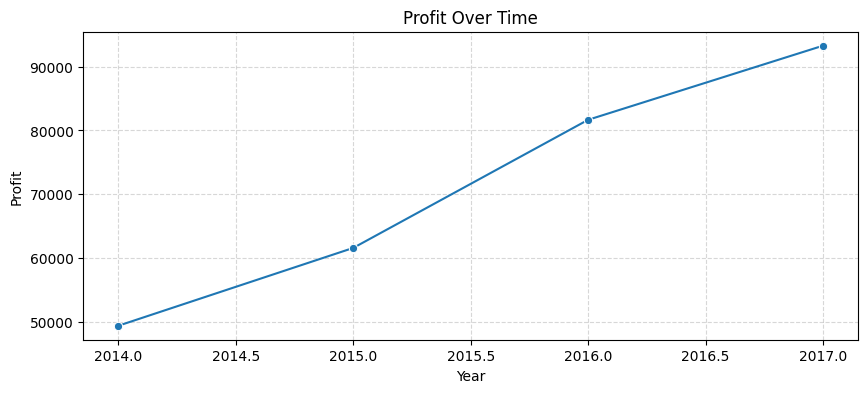

In [60]:
plt.figure(figsize=(10,4))
df['Year'] = pd.to_datetime(df['Order_Date']).dt.year

# df['Year'] = pd.to_datetime(df['OrderDate']).dt.year​
yearly_quantity = df.groupby('Year')['Profit'].sum().reset_index()
yearly_quantity['Year'] = yearly_quantity['Year'].astype(int)

sns.lineplot(data=yearly_quantity, x ="Year", y="Profit", marker="o")
plt.title('Profit Over Time')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

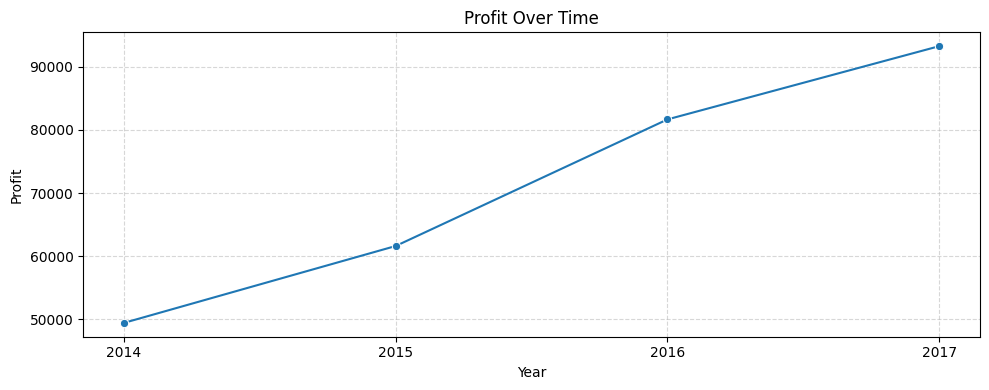

In [61]:
plt.figure(figsize=(10, 4))
df['Year'] = pd.to_datetime(df['Order_Date']).dt.year

yearly_quantity = df.groupby('Year')['Profit'].sum().reset_index()
yearly_quantity['Year'] = yearly_quantity['Year'].astype(int)
sns.lineplot(data=yearly_quantity, x="Year", y="Profit", marker="o")
plt.title('Profit Over Time')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(ticks=yearly_quantity['Year']) 
plt.tight_layout()
plt.show()

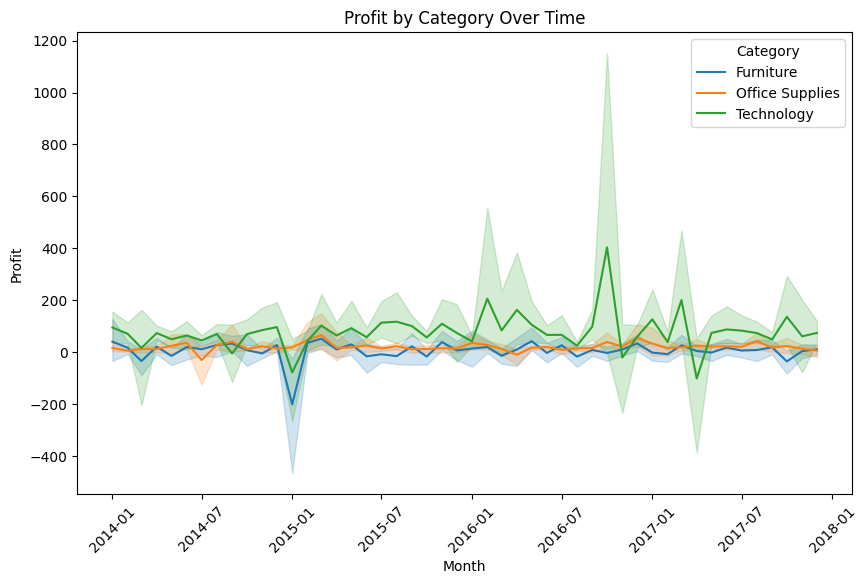

In [62]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Month', y='Profit', hue='Category')
plt.title('Profit by Category Over Time')
plt.xticks(rotation=45)
plt.show()

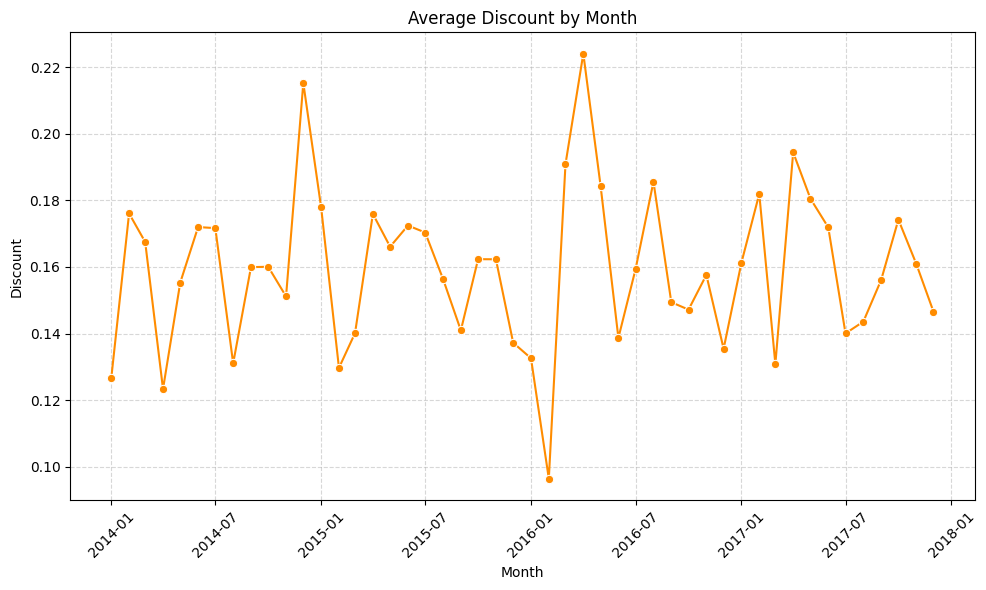

In [63]:
df['Month'] = pd.to_datetime(df['Order_Date']).dt.to_period('M')
df['Month'] = df['Month'].dt.to_timestamp()

# Group by Month and calculate average Discount​
monthly_discount = df.groupby('Month')['Discount'].mean().reset_index()

# Plot​
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_discount, x='Month', y='Discount', marker='o',
color='darkorange')
plt.title('Average Discount by Month')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

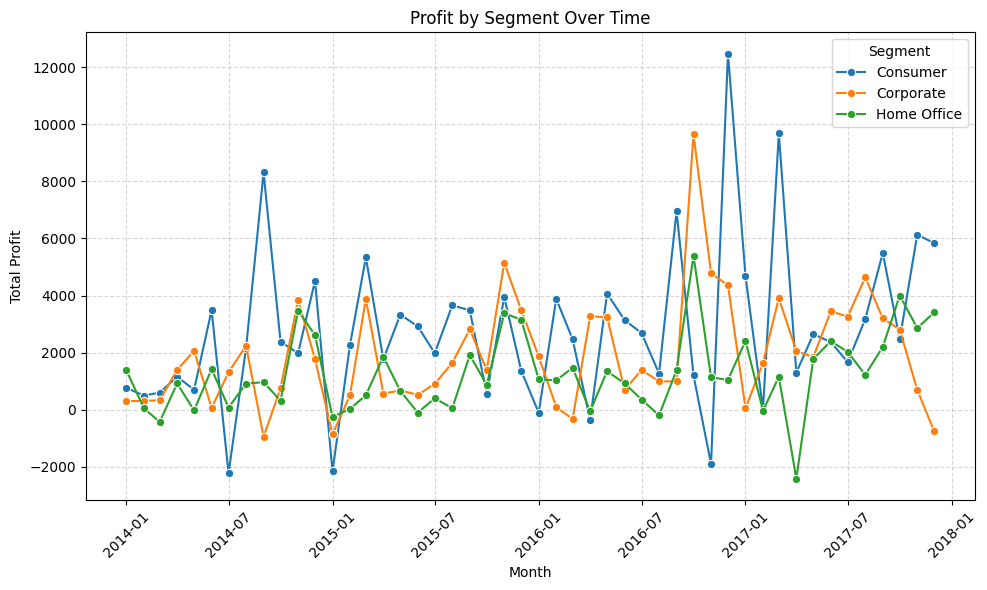

In [64]:
# Ensure Month is in timestamp format
df['Month'] = pd.to_datetime(df['Order_Date']).dt.to_period('M').dt.to_timestamp()

# Group by Month and Segment, then calculate total Profit
monthly_profit = df.groupby(['Month', 'Segment'])['Profit'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_profit, x='Month', y='Profit', hue='Segment', marker='o')
plt.title('Profit by Segment Over Time')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

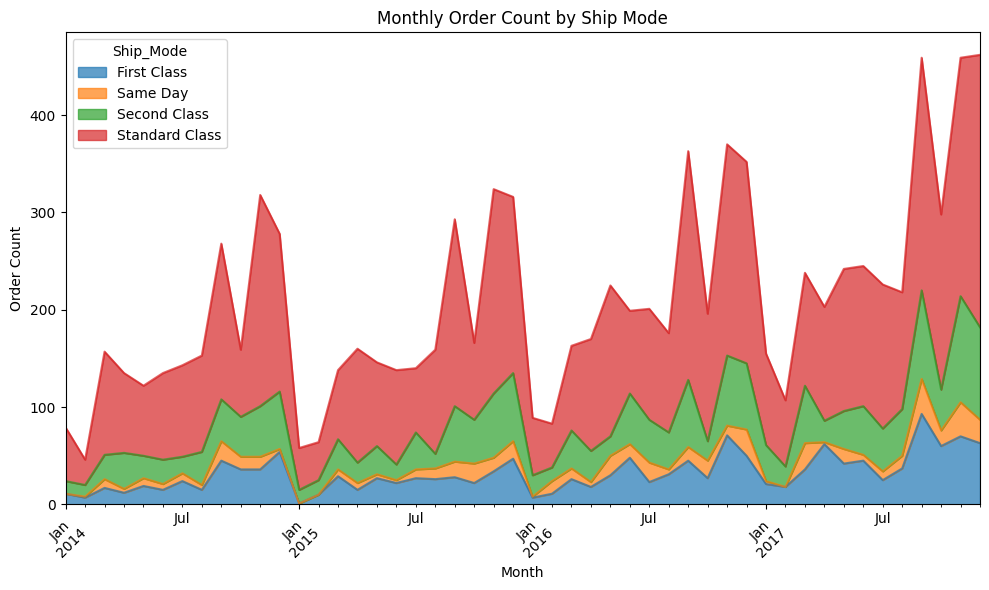

In [65]:
area_data = df.groupby(['Month','Ship_Mode'])['Order_ID'].count().unstack().fillna(0)

# Plot as area chart​
area_data.plot.area(figsize=(10, 6), alpha=0.7)
plt.title('Monthly Order Count by Ship Mode')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

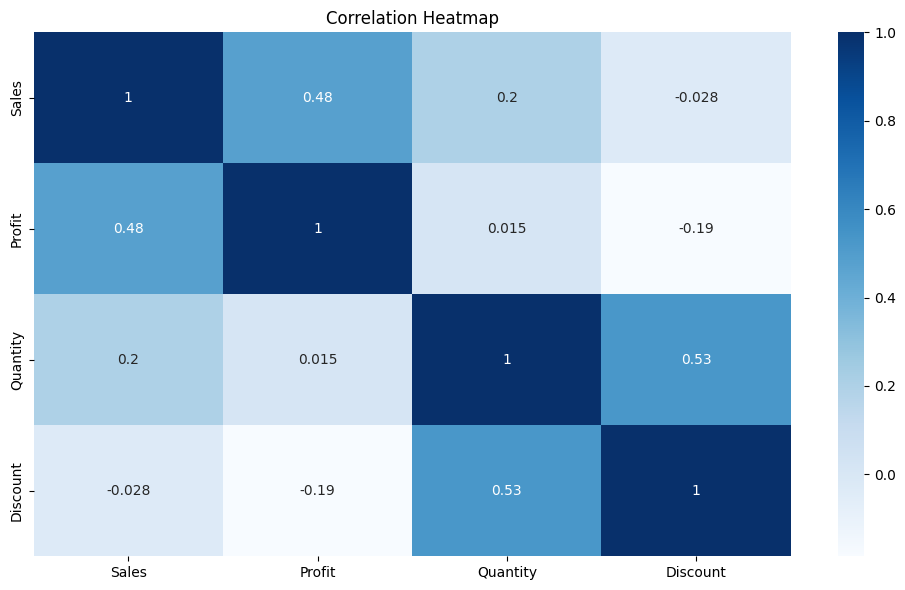

In [66]:
# Correlation heatmap
for col in ['Sales', 'Profit', 'Quantity', 'Discount']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
corr_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

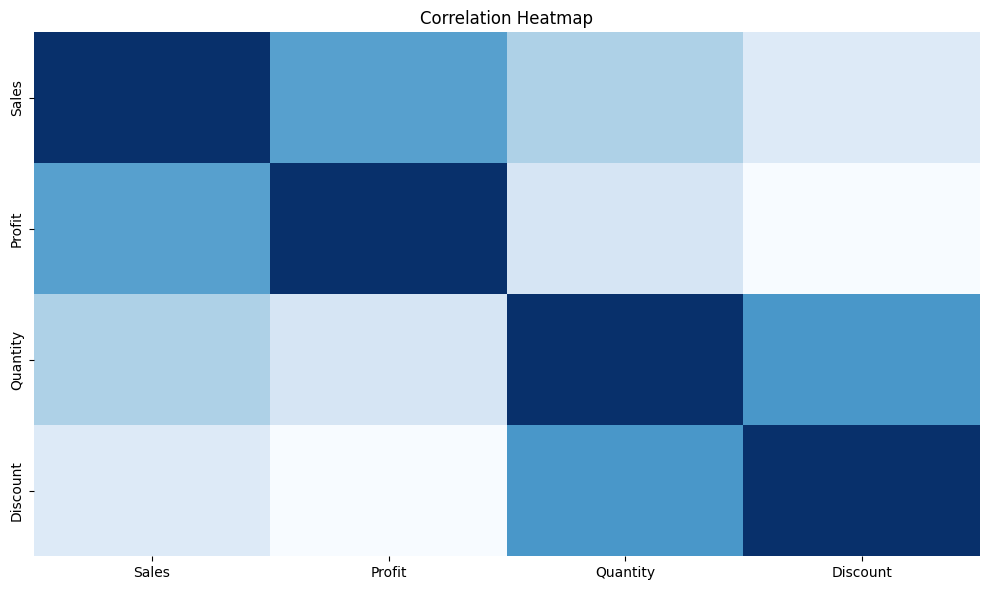

In [67]:
# Correlation heatmap​
corr_matrix = df[['Sales', 'Profit', 'Quantity', 'Discount']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, cmap='Blues', cbar=False)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

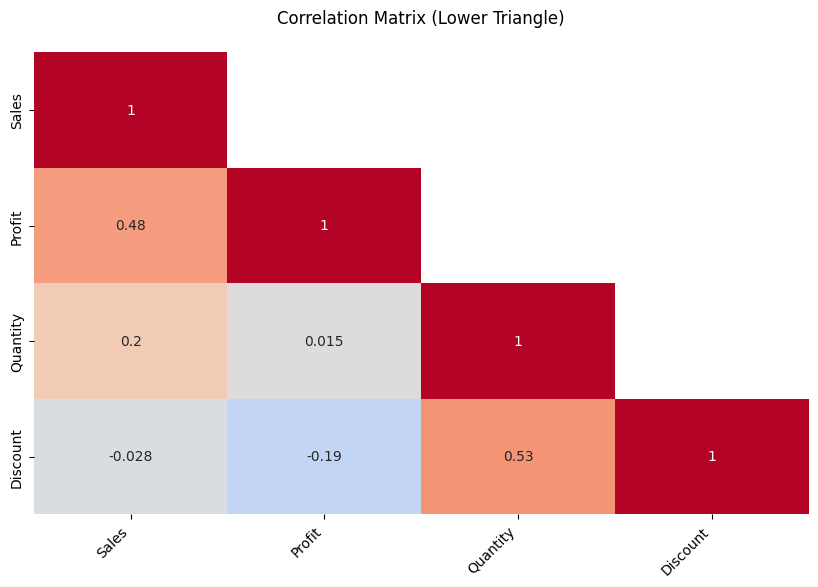

In [68]:
mask = np.triu(np.ones_like(corr_matrix), k=1)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, 
annot=True, 
cmap='coolwarm', 
vmin=-1, 
vmax=1, 
center=0, 
mask=mask,
cbar=False,
)
plt.title("Correlation Matrix (Lower Triangle)\n")
plt.xticks(rotation=45, ha="right")
plt.show()

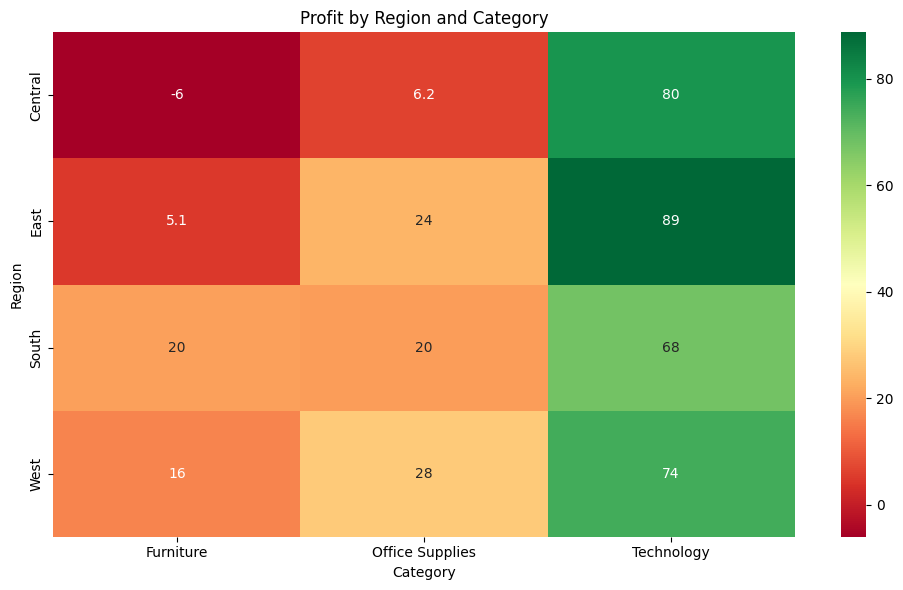

In [69]:
profit_pivot = df.pivot_table(values='Profit', 
index='Region', 
columns='Category', 
aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(profit_pivot, annot=True, cmap='RdYlGn')
plt.title('Profit by Region and Category')
plt.tight_layout()
plt.show()

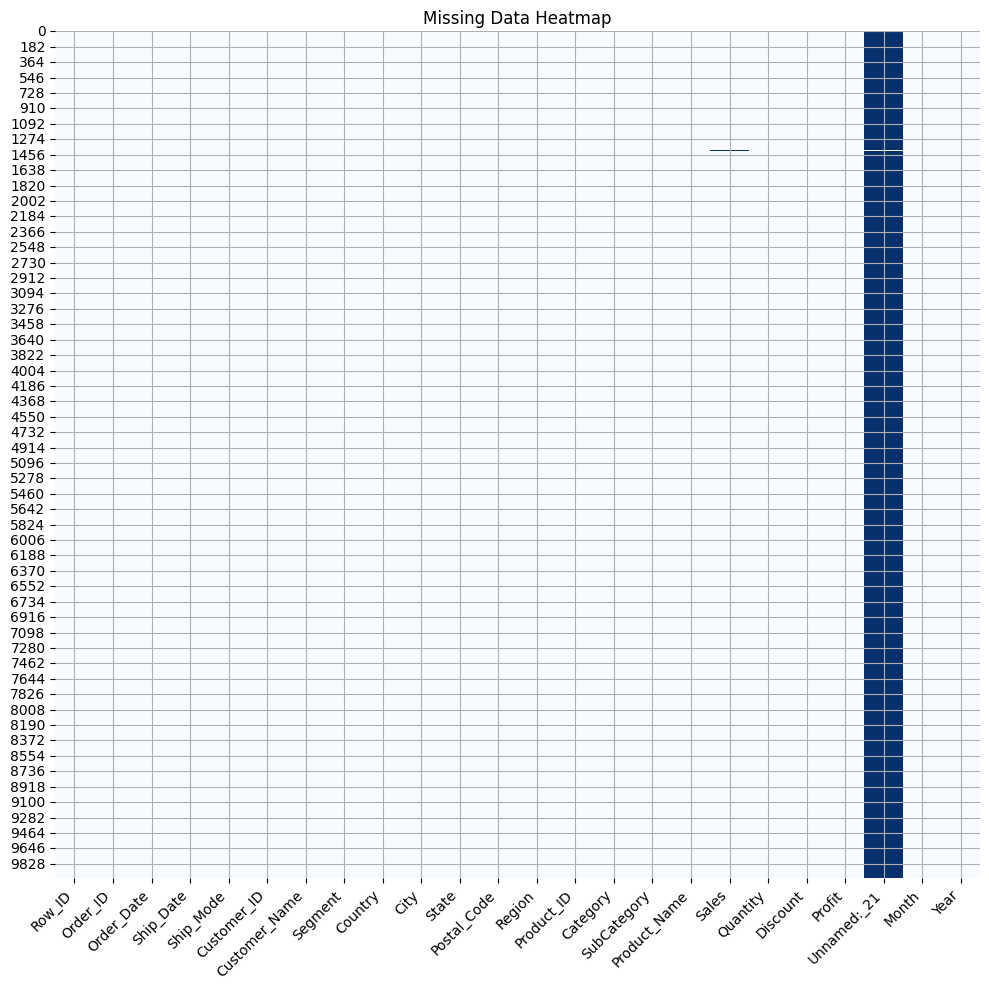

In [70]:
missing_data = df.isnull()
plt.figure(figsize=(10, 10))
sns.heatmap(missing_data, cbar=False, cmap='Blues')
plt.title('Missing Data Heatmap')
plt.grid(True)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

/home/kingtom/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kingtom/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kingtom/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kingtom/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kingtom/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/kingtom/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: User

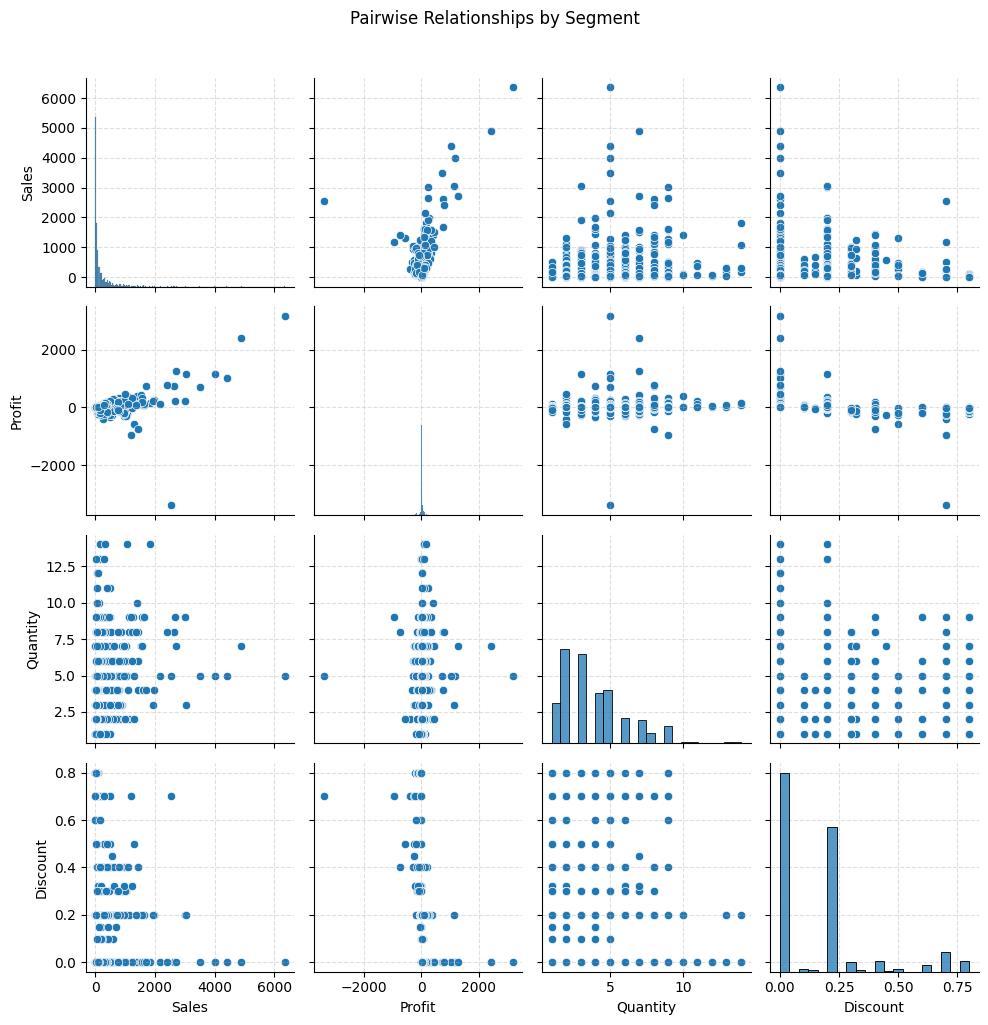

In [74]:
# Pair plot of Sales, Profit, Quantity, Discount
sample_df = df.sample(n=1000, random_state=1) if len(df) > 1000 else df
pair_data = sample_df[['Sales', 'Profit', 'Quantity', 'Discount', 'Segment']]
g = sns.pairplot(data=pair_data,
                 # hue='Segment',
                 diag_kind='hist',
                 palette='Set2',
                 height=2.5)
# Add grid to each inner plot
for ax in g.axes.flatten():
    if ax is not None:
        ax.grid(True, linestyle='--', alpha=0.4)

# Add title and spacing
plt.suptitle('Pairwise Relationships by Segment', y=1.02)
plt.tight_layout()
plt.show()

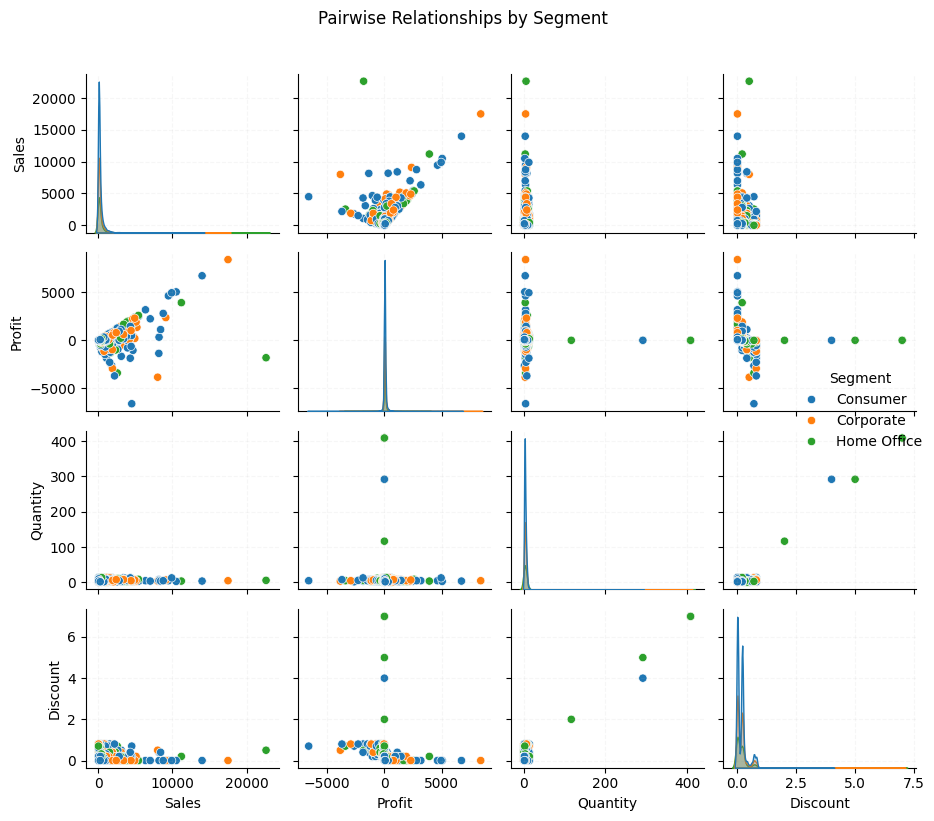

In [75]:
pair_data = df[['Sales', 'Profit', 'Quantity', 'Discount', 'Segment']]
g = sns.pairplot(pair_data, hue='Segment', diag_kind='kde', palette='tab10', height=2)

# Add grid to each inner plot
for ax in g.axes.flatten():
	if ax is not None:
		ax.grid(True, linestyle='--', alpha=0.1)
# Add title and spacing
plt.suptitle('Pairwise Relationships by Segment', y=1.02)
plt.tight_layout()

/home/kingtom/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kingtom/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kingtom/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kingtom/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kingtom/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/kingtom/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513:

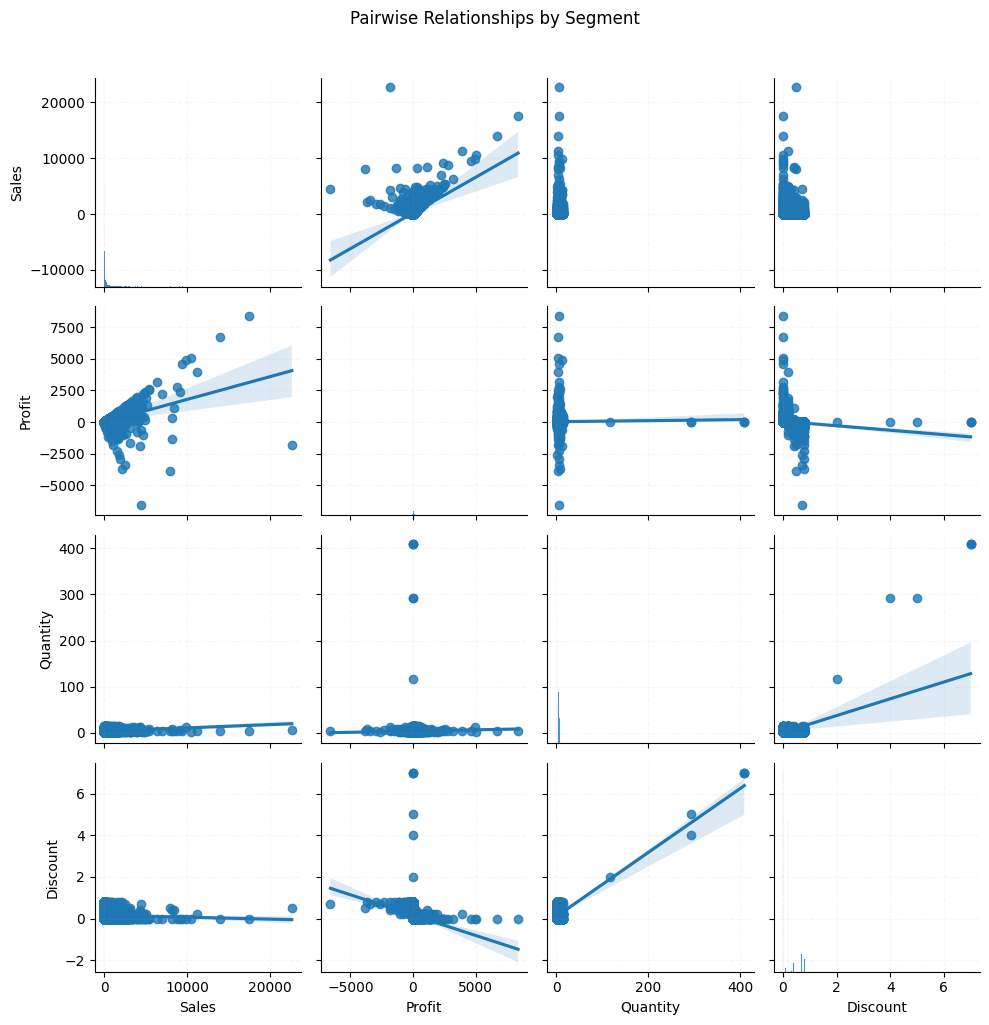

In [77]:
# Pair plot of Sales, Profit, Quantity, Discount​
pair_data = df[['Sales', 'Profit', 'Quantity', 'Discount', 'Segment']]
g = sns.pairplot(data=pair_data,
# hue='Segment',​
diag_kind='auto',
kind="reg",
palette='tab10', # Try 'husl', 'pastel', 'tab10', etc.​
height=2.5,)
# Add grid to each inner plot​
for ax in g.axes.flatten():
    if ax is not None:
        ax.grid(True, linestyle='--', alpha=0.1)

# Add title and spacing​
plt.suptitle('Pairwise Relationships by Segment', y=1.02)
plt.tight_layout()

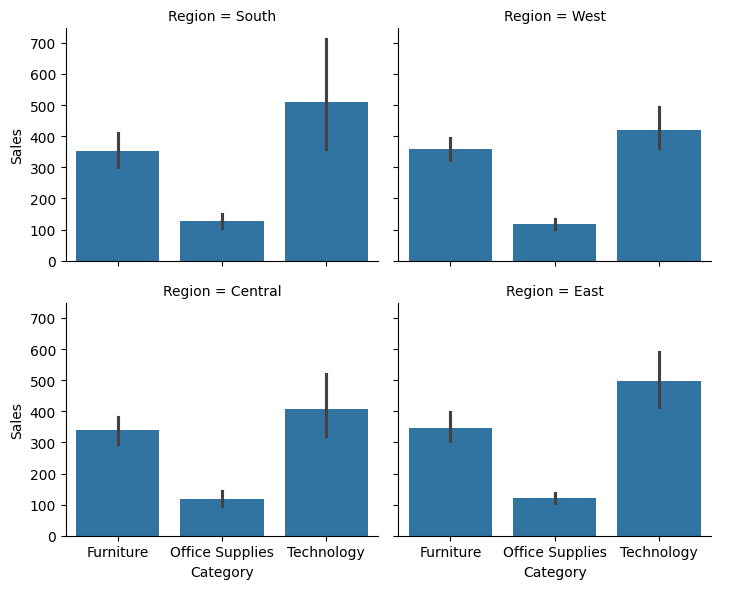

In [79]:
facet_sales_region = df[['Category', 'Sales', 'Region']]

g = sns.catplot(data=facet_sales_region, 
    x='Category', 
    y='Sales', 
    col='Region', 
    kind='bar', 
    col_wrap=2, 
    height=3, 
    aspect=1.2)
plt.tight_layout()

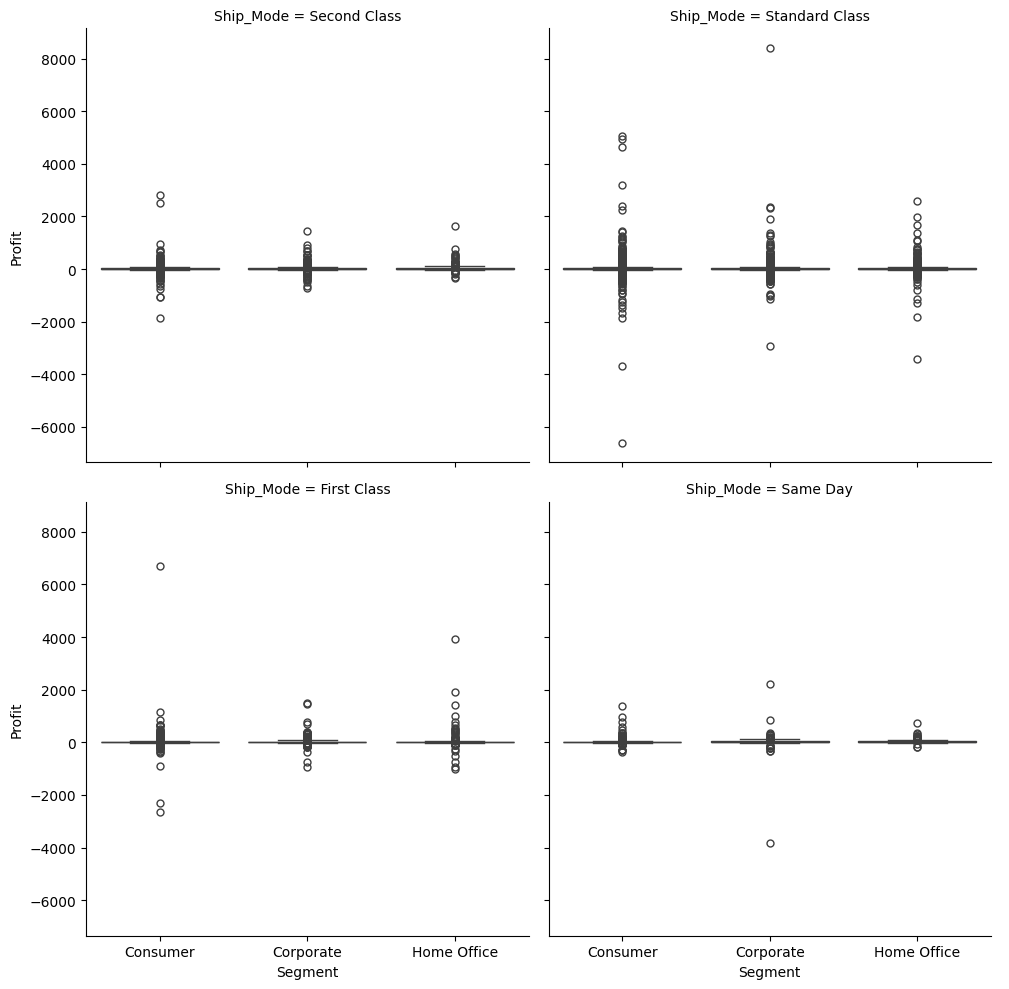

In [82]:
facet_profit_ship = df[['Segment', 'Profit', 'Ship_Mode']]
sns.catplot(data=facet_profit_ship, 
x='Segment', 
y='Profit', 
col='Ship_Mode', 
kind='box', 
col_wrap=2,
)
plt.tight_layout()
plt.show()

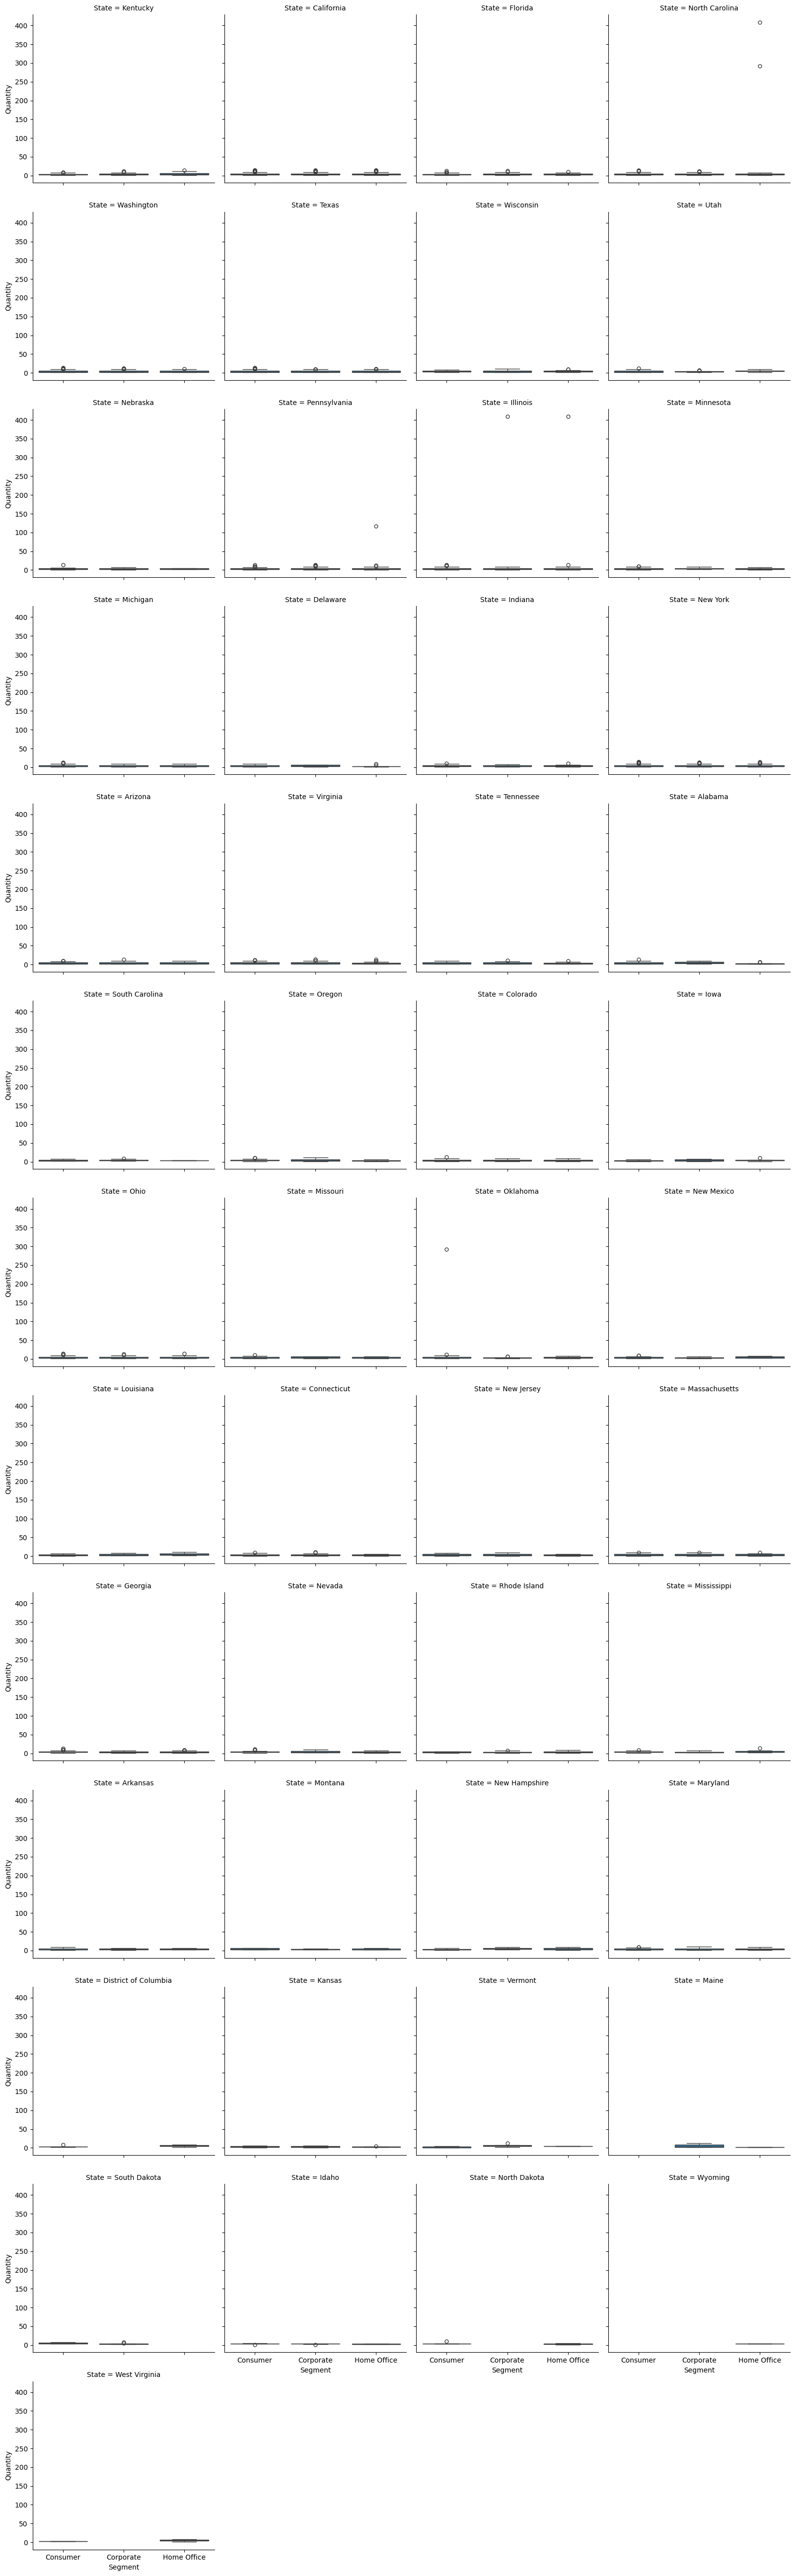

In [83]:
facet_quantity_state = df[['Segment', 'Quantity', 'State']]
sns.catplot(data=facet_quantity_state, 
x='Segment', 
y='Quantity', 
col='State', 
kind='box', 
col_wrap=4, 
height=4)
plt.tight_layout()
plt.show()

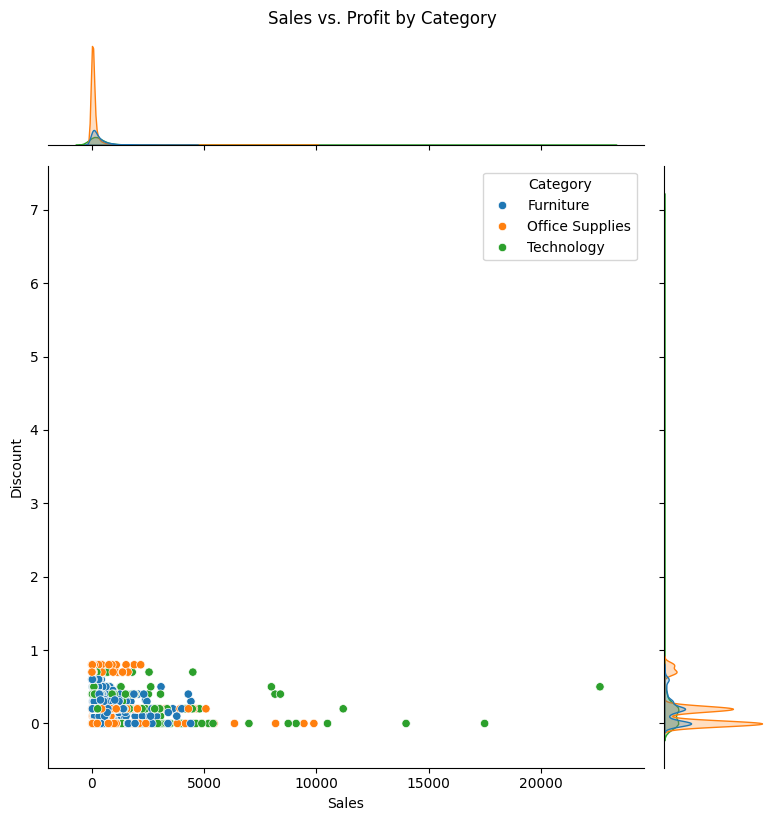

In [84]:
joint_data = df[['Sales', 'Discount', 'Category']]

sns.jointplot(data=joint_data, x='Sales', y='Discount', hue='Category',
height=8 )
plt.suptitle('Sales vs. Profit by Category', y=1.02)
plt.show()